<a href="https://colab.research.google.com/github/Leshma2210/Internship-task/blob/main/GRIP_spark_foundation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all libraries required in this notebook
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
### Reading data from remote link
data = pd.read_csv('http://bit.ly/w-data')
data.head(15)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


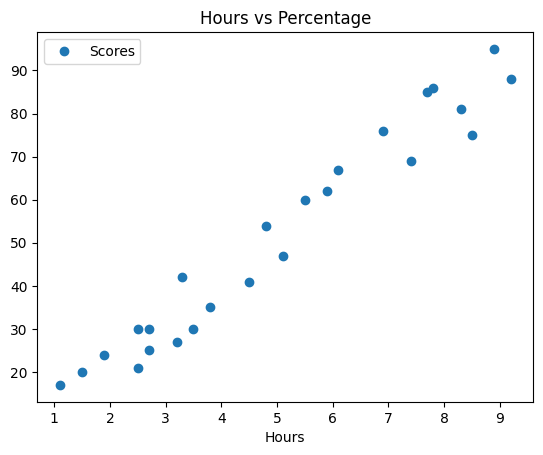

In [3]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.show()

In [4]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(x_train.reshape(-1,1), y_train)

LinearRegression()

In [6]:
print("Training Done!!")


Training Done!!


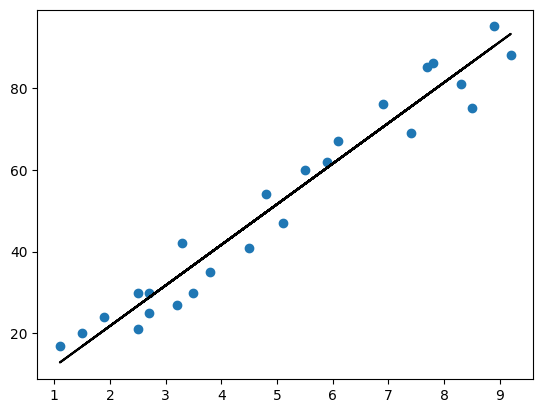

In [7]:
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter (x,y)
plt.plot (x, line, color = 'Black')
plt.show()

In [8]:
### Testing data - In Hours
print(x_test)

### Predicting the scores
y_pred = regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [9]:
### Comparing Actual vs Predicted
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [11]:
### Estimating the Training Data and Test Data Score
print("Training score:", regressor.score(x_train, y_train))
print("Testing score:", regressor.score(x_test, y_test))

Training score: 0.9515510725211552
Testing score: 0.9454906892105354


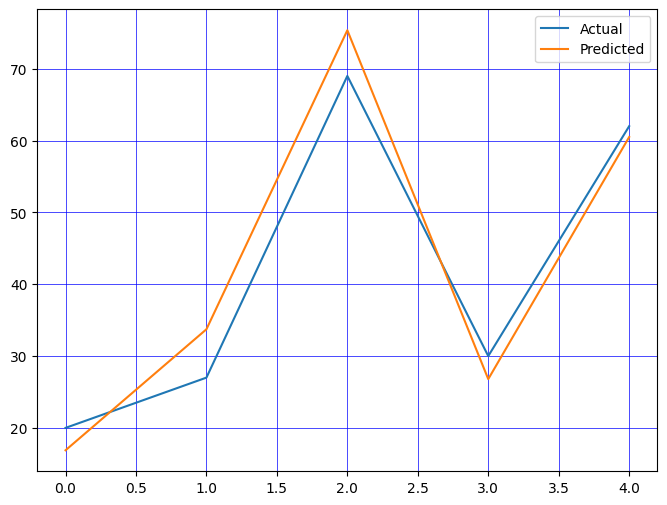

In [12]:
data.plot(kind='line', figsize=(8,6))
plt.grid(which='major', linewidth='0.5', color = 'black')
plt.grid(which='major', linewidth='0.5', color = 'blue')
plt.show()

In [13]:
### Testing your own data.
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
own_pred = regressor.predict(test)
print ("No. of Hours = {}".format(hours))
print ("Predicted Score = {}".format(own_pred[0]))

No. of Hours = 9.25
Predicted Score = 93.69173248737539


In [15]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root mean squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root mean squared Error: 4.647447612100373
